# Classification Metrics Roundup 

_By Jeff Hale_

---

## Learning Objectives
By the end of this lesson students will be able to:

- Understand binary classification metrics 
- Compute binary classification metrics by hand
- Use sklearn to compute binary classification metrics
---

### Read in titanic data from seaborn

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [2]:
df_titanic = sns.load_dataset('titanic', )
df_titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
survived       891 non-null int64
pclass         891 non-null int64
sex            891 non-null object
age            714 non-null float64
sibsp          891 non-null int64
parch          891 non-null int64
fare           891 non-null float64
embarked       889 non-null object
class          891 non-null category
who            891 non-null object
adult_male     891 non-null bool
deck           203 non-null category
embark_town    889 non-null object
alive          891 non-null object
alone          891 non-null bool
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


#### Split into x and y. 

Let's use `survived` for y and `sex` and `class` for X.

In [4]:
X = df_titanic[['sex', 'class']]
y = df_titanic['survived']

In [5]:
X.head()

,sex,class
0,male,Third
1,female,First
2,female,Third
3,female,First
4,male,Third


In [6]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: survived, dtype: int64

In [7]:
y.value_counts()

0    549
1    342
Name: survived, dtype: int64

In [8]:
y.value_counts(normalize=True)

0    0.616162
1    0.383838
Name: survived, dtype: float64

## Split into training and test sets

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=7)

In [10]:
X_train.head(2)

,sex,class
709,male,Third
558,female,First


In [11]:
X_test.head(2)

,sex,class
725,male,Third
861,male,Second


In [12]:
y_train.head(2)

709    1
558    1
Name: survived, dtype: int64

In [13]:
y_test.head(2)

725    0
861    0
Name: survived, dtype: int64

### Make an object from the OneHotEncoder class. 

#### Warning! ☝️  The arguments are important here. 

In [14]:
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')
ohe

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='ignore', sparse=False)

### Save the fit and transformed training data

In [15]:
X_train_dummified = ohe.fit_transform(X_train, y_train)
X_train_dummified

array([[0., 1., 0., 0., 1.],
       [1., 0., 1., 0., 0.],
       [1., 0., 0., 1., 0.],
       ...,
       [1., 0., 1., 0., 0.],
       [0., 1., 0., 0., 1.],
       [0., 1., 0., 0., 1.]])

### Save the transformed `X_test`

In [16]:
X_test_dummified = ohe.transform(X_test)
X_test_dummified

array([[0., 1., 0., 0., 1.],
       [0., 1., 0., 1., 0.],
       [0., 1., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 1.],
       [0., 1., 0., 0., 1.],
       [1., 0., 0., 1., 0.]])

In [17]:
pd.get_dummies(X_train)

,sex_female,sex_male,class_First,class_Second,class_Third
709,0,1,0,0,1
558,1,0,1,0,0
327,1,0,0,1,0
256,1,0,1,0,0
51,0,1,0,0,1
...,...,...,...,...,...
579,0,1,0,0,1
502,1,0,0,0,1
537,1,0,1,0,0
196,0,1,0,0,1


## Make a LogisticRegression model

In [18]:
logreg = LogisticRegression()


### Fit the model

In [19]:
logreg.fit(X_train_dummified, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Create the model predictions

In [20]:
preds = logreg.predict(X_test_dummified)

In [21]:
preds[:6]

array([0, 0, 0, 0, 1, 1])

In [22]:
probs = logreg.predict_proba(X_test_dummified)
probs[:6]

array([[0.91001718, 0.08998282],
       [0.777694  , 0.222306  ],
       [0.91001718, 0.08998282],
       [0.91001718, 0.08998282],
       [0.09931411, 0.90068589],
       [0.16955327, 0.83044673]])

In [23]:
logreg.score(X_test_dummified, y_test)

0.7309417040358744

### Generate the confusion matrix

In [24]:
confusion_matrix(y_test, preds)

array([[111,  24],
       [ 36,  52]])

In [25]:
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()
tn

111

In [26]:
fp

24

In [27]:
fn

36

In [28]:
tp

52

### Try out the plot_confusion_matrix method

In [29]:
from sklearn.metrics import plot_confusion_matrix

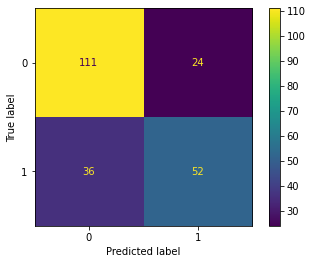

In [30]:
plot_confusion_matrix(logreg, X_test_dummified, y_test, values_format = '.5g')

Accuracy = 73%

#### Compute the True Postive Rate

In [31]:
tp/(tp+fn)

0.5909090909090909

#### Compute the Sensitivity

In [32]:
# same

#### Compute the Recall

In [33]:
# same

#### Compute the Precision

In [34]:
tp / (tp + fp)

0.6842105263157895

#### Compute the Specificity

In [35]:
tn/ (tn + fp)

0.8222222222222222

In [36]:
from sklearn.metrics import recall_score, precision_score

In [37]:
recall_score(y_test, preds)

0.5909090909090909

In [38]:
precision_score(y_test, preds)

0.6842105263157895

In [39]:
from sklearn.metrics import classification_report

In [40]:
classification_report(y_test, preds, output_dict=True)

{'0': {'precision': 0.7551020408163265,
  'recall': 0.8222222222222222,
  'f1-score': 0.7872340425531914,
  'support': 135},
 '1': {'precision': 0.6842105263157895,
  'recall': 0.5909090909090909,
  'f1-score': 0.6341463414634148,
  'support': 88},
 'accuracy': 0.7309417040358744,
 'macro avg': {'precision': 0.719656283566058,
  'recall': 0.7065656565656566,
  'f1-score': 0.7106901920083031,
  'support': 223},
 'weighted avg': {'precision': 0.7271269140179083,
  'recall': 0.7309417040358744,
  'f1-score': 0.7268227524370463,
  'support': 223}}

### Make the ROC curve

In [41]:
from sklearn.metrics import roc_auc_score, plot_roc_curve
import matplotlib.pyplot as plt

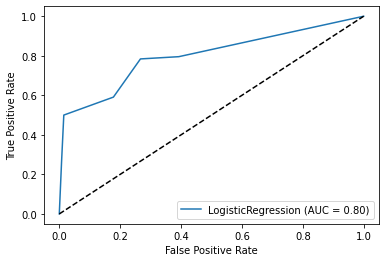

In [42]:
plot_roc_curve(logreg, X_test_dummified, y_test);
plt.plot([0, 1], [0, 1], 'k--')

### What's the ROC AUC score?

Recall that `.predict_proba()` method will return the probabilities of both classes in a numpy array.

In [43]:
both_probs = logreg.predict_proba(X_test_dummified)
both_probs[:5]

array([[0.91001718, 0.08998282],
       [0.777694  , 0.222306  ],
       [0.91001718, 0.08998282],
       [0.91001718, 0.08998282],
       [0.09931411, 0.90068589]])

In [44]:
roc_auc_score(y_test, probs)

ValueError: bad input shape (223, 2)

### F1 score

2 *    (Precision * Recall)      /      (Precision  + Recall)

In [ ]:
from sklearn.metrics import f1_score

In [ ]:
f1_score(y_test, preds)

### Balanced Accuracy Score

When is balanced accuracy a good metric to use?

Average of TPR and TNR

(Sensitivity + Specificity) / 2

In [45]:
# compute sensitivity
tp / (tp + fn)

0.5909090909090909

In [46]:
# compute specificity
tn / (tn+fp)

0.8222222222222222

In [ ]:
# compute balanced accuracy


In [ ]:
# use sklearn to do it the fast way


# Summary

You've seen how to compute common classification metrics by hand and using sklearn. 🎉

### Check for Understanding

What do the following terms mean in words? How would you compute them? When would you want to use each one?

- Recall
- Precision
- Sensitivity
- Specificity
- Balanced Accuracy
- F1 Score
- ROC AUC 
- Accuracy